In [7]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import sklearn.linear_model
import sklearn.model_selection

In [99]:
df = pd.read_csv("Cars93.csv")

In [101]:
df.shape

(93, 28)

In [12]:
x = np.array(df.Horsepower)
y = np.array(df.Price)

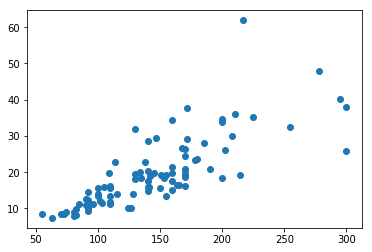

In [36]:
plt.scatter(df.Horsepower,df.Price)

# Leave-one-out CV

In [28]:
errors = []
for pn in range(0,11):

    error = 0

    for i in range(len(df.Horsepower)):
        x = np.array(df.Horsepower)
        y = np.array(df.Price)
        leftoutx = x[i]
        leftouty = y[i]
        x = np.delete(x,i)
        y = np.delete(y,i)

        z = np.polyfit(x, y, pn)
        p = np.poly1d(z)

        # print(leftouty)
        error += (leftouty-p(leftoutx))**2
    error = error/(len(df.Horsepower)-1)

    errors.append(error)
    print(error)


95.34396335888056
37.691891795884814
38.42427400690655
38.26397976505419
38.32175583782298
39.40236942969809
41.84544825677623
43.82481229471467
43.52032592394566
45.15112896189192
57.358640723310465


Text(0,0.5,'CV')

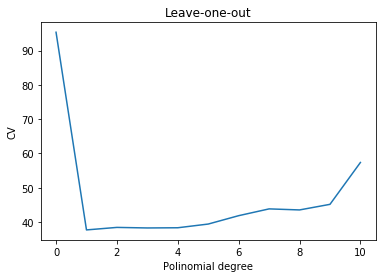

In [35]:
plt.plot(range(0,11),errors)
plt.title('Leave-one-out')
plt.xlabel("Polinomial degree")
plt.ylabel("CV")

# k-fold CV

In [37]:
def MSE(ye,y):
    return (ye-y)**2/len(ye)
    

In [102]:
errors = []
# k = len(df.Horsepower)
k=10
for pn in range(0,11):

    error = 0
    x = np.array(df.Horsepower)
    y = np.array(df.Price)
    
    for i in range(k):
        kx = np.array_split(x,k)
        ky = np.array_split(y,k)
        
        leftoutx = kx.pop(i)
        leftouty = ky.pop(i)

        z = np.polyfit(np.concatenate(kx), np.concatenate(ky), pn)
        p = np.poly1d(z)

        error += sum((leftouty-p(leftoutx))**2)
        error = error/len(leftoutx)
    
    error = error/k

    errors.append(error)
    print(error)


3.0524559595964473
1.7516818594831054
1.6443230534862896
2.3916970411760956
2.258547880363763
2.0182989371420557
1.9397890452324855
1.99013031175287
1.7928760286356031
1.9869184346511404
2.039679949825188


Text(0,0.5,'CV')

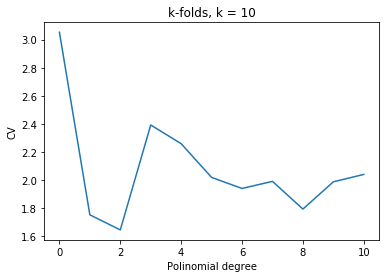

In [103]:
plt.plot(range(0,11),errors)
plt.title('k-folds, k = {}'.format(k))
plt.xlabel("Polinomial degree")
plt.ylabel("CV")

# BIC CV

### $$CV = nlog(p)-2log(\hat{L})$$

In [112]:
sigma = np.std(df.Price)

cvs = []
x = np.array(df.Horsepower)
y = np.array(df.Price)
for pn in range(1,11):
    
    z = np.polyfit(x,y, pn)
    p = np.poly1d(z)
    
    parteLikelihood = sum(np.log(1/((2*np.pi*sigma**2)**0.5)) - (y-p(x))**2/(2*sigma**2))
    
    cv= pn*np.log(len(x)) -2*parteLikelihood

    
    cvs.append(cv)




Text(0,0.5,'CV')

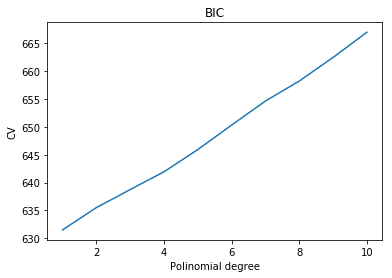

In [113]:
plt.plot(range(1,11),cvs)
plt.title('BIC')
plt.xlabel("Polinomial degree")
plt.ylabel("CV")